In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]



In [8]:
# these are parameterized over papermill
from cisclient.client import CISClient
from lcb.cisvis.spectra import generate_spectra_plot, generate_similarity_plot, to_dataframe, \
    generate_histogram_accurate_mass, generate_histogram_intensity, generate_head_tail_plot, generate_histogram_ri
cis_url = 'https://dev-api.metabolomics.us/cis'
cis_api_token = 'rDJfRW6ilG2WooOR72AaE3NqL4m23WvY6ub4FEoS'
library = "soqe[M+H][M+NH4] | QExactive | test | positive"

In [9]:

client =  CISClient(cis_url, cis_api_token)
data = []
compounds = client.get_compounds_by_type(library=library,target_type='CONFIRMED_CONSENSUS',autopage=True)

In [10]:
print("{} contains {} confirmed compounds".format(library,len(compounds)))

soqe[M+H][M+NH4] | QExactive | test | positive contains 2857 confirmed compounds


In [11]:
for splash in compounds:
    compound = client.get_compound(library=library, splash=splash)
    data.append(compound)


this plot plots all similarity scores of this library against each other

Index contains duplicate entries, cannot reshape


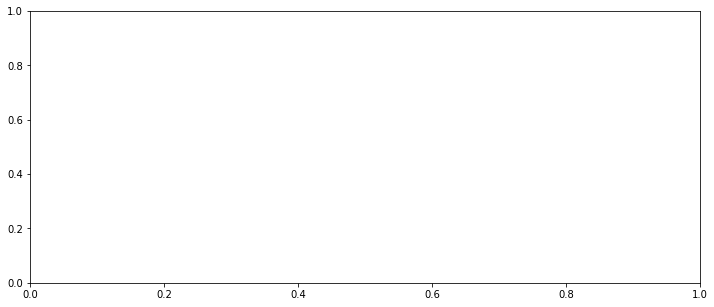

In [12]:
sim = generate_similarity_plot(data)
lib = to_dataframe(data)
lib['members'] = lib['splash'].apply(lambda x: list(map(lambda y: client.get_compound(library=library,splash=y),client.get_members(library=library,splash=x,autopage=True))))

lib_to_show = lib.drop(['accurate_mass','spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name'],axis=1)

this is the content of the actual library

In [13]:
lib_to_show

,id,matrix,retention_index,sample,precursor_mass,members
0,1062070,,229.793849,consensus spectrum from 1 samples,419.316376,"[{'id': 1062070, 'accurate_mass': 419.31637573..."
1,1062071,,345.230711,consensus spectrum from 1 samples,613.481750,"[{'id': 1062071, 'accurate_mass': 613.48175048..."
2,1062072,,661.537928,consensus spectrum from 1 samples,413.267426,"[{'id': 1062072, 'accurate_mass': 413.26742553..."
3,1062073,,222.451066,consensus spectrum from 1 samples,702.215271,"[{'id': 1062073, 'accurate_mass': 702.21527099..."
4,1057127,,650.124603,consensus spectrum from 1 samples,680.633484,"[{'id': 1057127, 'accurate_mass': 680.63348388..."
...,...,...,...,...,...,...
2852,1078858,,648.473450,consensus spectrum from 1 samples,855.744568,"[{'id': 1078858, 'accurate_mass': 855.74456787..."
2853,1078859,,651.555879,consensus spectrum from 1 samples,850.787476,"[{'id': 1078859, 'accurate_mass': 850.78747558..."
2854,1078860,,553.076380,consensus spectrum from 1 samples,842.728149,"[{'id': 1078860, 'accurate_mass': 842.72814941..."
2855,1078861,,349.593935,consensus spectrum from 1 samples,817.588013,"[{'id': 1078861, 'accurate_mass': 817.58801269..."


This is a visualization of the spectra each consensus is made up off

/home/wohlgemuth/PycharmProjects/carpy/lcb/.venv/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/wohlgemuth/PycharmProjects/carpy/lcb/.venv/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/wohlgemuth/PycharmProjects/carpy/lcb/.venv/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


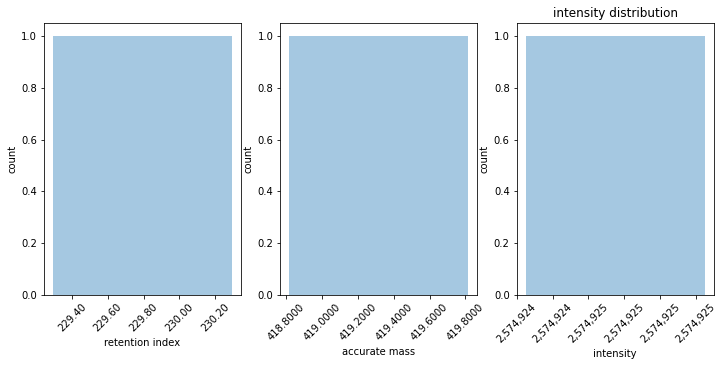

TypeError: generate_head_tail_plot() missing 1 required positional argument: 'figsize'

In [14]:
def show(compound,members):

    fig, axes = plt.subplots(1, 3)

    generate_histogram_ri(members,axes=axes[0])
    generate_histogram_accurate_mass(members,axes=axes[1])
    generate_histogram_intensity(members,axes=axes[2])

    plt.show()
    for member in members:
        generate_head_tail_plot(member=member,compound=compound)

    mem = to_dataframe(members).drop(['accurate_mass','spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name'],axis=1)
    return mem
members = [show(compound, members) for compound, members in zip(lib['splash'].apply(lambda x: client.get_compound(library=library,splash=x)), lib['members'])]

